# 0. Import packages

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import pyarrow as pa
import pyarrow.parquet as pq

# 1. Load Base Dataset

In [3]:
train = pd.read_parquet('/content/drive/MyDrive/corca/train.parquet')
test= pd.read_parquet('/content/drive/MyDrive/corca/test.parquet')

In [4]:
y_train =  train['click']

In [5]:
x_train = train.drop('click', axis =1)

In [6]:
x_all = pd.concat([x_train,test], axis =0)

In [7]:
x_all.head()

,id,date,f_1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,...,device_type,device_conn_type,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9
0,1,2023-04-17,0,0,b3b6aa0a,f3845767,d4a6d311,8e48d2b0,8ef319ef,54a01db7,...,1,2,15706,320,50,1722,0,35,-1,79
1,2,2023-04-17,0,0,b3b6aa0a,f3845767,d4a6d311,8e48d2b0,8ef319ef,54a01db7,...,1,0,15704,320,50,1722,0,35,100084,79
2,3,2023-04-17,0,0,b3b6aa0a,f3845767,d4a6d311,8e48d2b0,8ef319ef,54a01db7,...,1,0,15704,320,50,1722,0,35,100084,79
3,4,2023-04-17,0,0,b3b6aa0a,f3845767,d4a6d311,8e48d2b0,8ef319ef,54a01db7,...,1,0,15706,320,50,1722,0,35,100084,79
4,5,2023-04-17,0,1,45379df9,9166c161,216e0615,8e48d2b0,8ef319ef,54a01db7,...,1,0,18993,320,50,2161,0,35,-1,157


In [8]:
x_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40428967 entries, 0 to 40428966
Data columns (total 23 columns):
 #   Column            Dtype         
---  ------            -----         
 0   id                int64         
 1   date              datetime64[ns]
 2   f_1               int64         
 3   banner_pos        int64         
 4   site_id           object        
 5   site_domain       object        
 6   site_category     object        
 7   app_id            object        
 8   app_domain        object        
 9   app_category      object        
 10  device_id         object        
 11  device_ip         object        
 12  device_model      object        
 13  device_type       int64         
 14  device_conn_type  int64         
 15  f_2               int64         
 16  f_3               int64         
 17  f_4               int64         
 18  f_5               int64         
 19  f_6               int64         
 20  f_7               int64         
 21  f_8   

# 2. Load additional dataset
- Explain here the additional dataset that you used.
- If you do not use any additional dataset, it's ok and keep empty the below cell.

# 3. EDA and Preprocessing
- Conduct exploratory data analysis and explain the insights from your analyses.
- Conduct data preprocessing, including feature engineering, and explain your insights that derive such techniques.

In [ ]:
def hex_to_decimal(hex_str):
    return int(hex_str, 16)

In [ ]:
hex_col = ['app_id','app_domain','app_category','site_id','site_domain','site_category','device_id','device_ip','device_model']

In [ ]:
x_all[hex_col].head()

In [ ]:
for col in hex_col:
    x_all[col] = x_all[col].apply(hex_to_decimal)

In [ ]:
x_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40428967 entries, 0 to 40428966
Data columns (total 23 columns):
 #   Column            Dtype         
---  ------            -----         
 0   id                int64         
 1   date              datetime64[ns]
 2   f_1               int64         
 3   banner_pos        int64         
 4   site_id           int64         
 5   site_domain       int64         
 6   site_category     int64         
 7   app_id            int64         
 8   app_domain        int64         
 9   app_category      int64         
 10  device_id         int64         
 11  device_ip         int64         
 12  device_model      int64         
 13  device_type       int64         
 14  device_conn_type  int64         
 15  f_2               int64         
 16  f_3               int64         
 17  f_4               int64         
 18  f_5               int64         
 19  f_6               int64         
 20  f_7               int64         
 21  f_8   

In [ ]:
from datetime import datetime
import math

In [ ]:
def datetime_to_day(datetime):
    day= math.floor((int(datetime.timestamp()) - 1681689600)/86400) + 1
    return day

def datetime_to_hour(datetime):
     day= math.floor((int(datetime.timestamp()) - 1681689600)/86400) + 1
     hour = ((int(datetime.timestamp()) - 1681689600) - (day-1)*86400)/3600
     return hour

In [ ]:
x_all['day'] =  x_all['date'].apply(datetime_to_day)

In [ ]:
x_all['hour'] =  x_all['date'].apply(datetime_to_hour)

In [ ]:
x_all['hour'].unique()

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23.])

In [ ]:
x_all.head()

,id,date,f_1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,...,f_3,f_4,f_5,f_6,f_7,f_8,f_9,time,day,hour
0,1,2023-04-17,0,0,3015092746,4085536615,3567702801,2387137200,2398296559,1419779511,...,320,50,1722,0,35,-1,79,1681689600,1,0.0
1,2,2023-04-17,0,0,3015092746,4085536615,3567702801,2387137200,2398296559,1419779511,...,320,50,1722,0,35,100084,79,1681689600,1,0.0
2,3,2023-04-17,0,0,3015092746,4085536615,3567702801,2387137200,2398296559,1419779511,...,320,50,1722,0,35,100084,79,1681689600,1,0.0
3,4,2023-04-17,0,0,3015092746,4085536615,3567702801,2387137200,2398296559,1419779511,...,320,50,1722,0,35,100084,79,1681689600,1,0.0
4,5,2023-04-17,0,1,1161272825,2439430497,560858645,2387137200,2398296559,1419779511,...,320,50,2161,0,35,-1,157,1681689600,1,0.0


In [ ]:
input_col = x_all.columns.tolist()

In [ ]:
input_col = input_col[2:]

In [ ]:
x_input = x_all[input_col]

In [ ]:
#check
x_all.to_parquet('/content/drive/MyDrive/corca/data.parquet', engine = 'pyarrow', index = False)

In [ ]:
x_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40428967 entries, 0 to 40428966
Data columns (total 25 columns):
 #   Column            Dtype         
---  ------            -----         
 0   id                int64         
 1   date              datetime64[ns]
 2   f_1               int64         
 3   banner_pos        int64         
 4   site_id           int64         
 5   site_domain       int64         
 6   site_category     int64         
 7   app_id            int64         
 8   app_domain        int64         
 9   app_category      int64         
 10  device_id         int64         
 11  device_ip         int64         
 12  device_model      int64         
 13  device_type       int64         
 14  device_conn_type  int64         
 15  f_2               int64         
 16  f_3               int64         
 17  f_4               int64         
 18  f_5               int64         
 19  f_6               int64         
 20  f_7               int64         
 21  f_8   

# 4. Modeling

In [ ]:
# function to compute R^2 & RMSE and print them
# prefix : string to be printed at the front of a line
def model_perf(model, X, Y, prefix=''):
    Yhat = model.predict(X)
    r2 = r2_score(Y, Yhat)
    rmse = mean_squared_error(Y, Yhat, squared=False)
    print (f'{prefix} R^2 score = {r2:.3f}, RMSE = {rmse:.4f}')
    y_exp = np.exp(Y)
    Y_hat = np.exp(model.predict(X))
    score = np.mean(abs(Y_hat-y_exp))
    print("score", score)

def model_fit_perf(model, X_all, Y_all, prefix=''):
    X_trn, X_val, Y_trn, Y_val = train_test_split(X_all, Y_all, test_size=0.2, random_state=0)
    model.fit(X_trn, Y_trn)
    print (prefix)
    model_perf(model, X_trn, Y_trn, '  Training  ')
    model_perf(model, X_val, Y_val, '  Validation')
    kfold = KFold(n_splits=5, shuffle=True, random_state=0)
    s = cross_val_score(model, X_all, Y_all, cv=kfold)
    print (f'  Cross val. R^2 score mean = {s.mean():.3f}, std = {s.std():.3f}')

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score, KFold

# extract exam data from pre-processed combined data
def split_train_exam(X_combined, n):
    X_task = X_combined.iloc[:n,:]
    X_exam = X_combined.iloc[n:,:]
    return X_task, X_exam


In [ ]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score

In [ ]:
X_task, X_exam = split_train_exam(x_input, x_train.shape[0])

NameError: ignored

In [ ]:
X_test, X_val, y_test, y_val = train_test_split(X_task, y_train, test_size=0.8, random_state=42)

In [ ]:
lgb_clf = lgb.LGBMClassifier(num_leaves=31, objective='binary')
lgb_clf.fit(X_test, y_test)
y_pred = lgb_clf.predict(X_val)
accuracy_score(y_val, y_pred)

In [ ]:
X_task, X_exam = split_train_exam(x_input, x_train.shape[0])

params = {'max_depth': 4,
            'learning_rate': 0.25,
            'n_estimators': 1000,
            'min_child_samples': 43,
            'subsample': 0.8672428625433954,
            'metric':'auc',
            'seed':42,
          'objective':'binary'}

model = lgb.LGBMClassifier(**params)
model_fit_perf(model, X_task, y_train, "LGBM")

LGBM
  Training   R^2 score = 0.995, RMSE = 0.0453
score 12594.75063819131
  Validation R^2 score = 0.991, RMSE = 0.0631
score 16788.07477674044
  Cross val. R^2 score mean = 0.991, std = 0.000


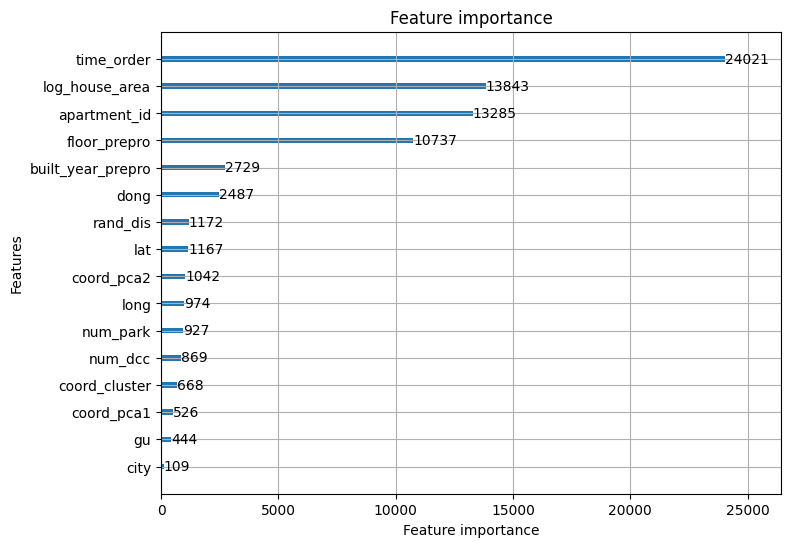

In [ ]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,6))
plot_importance(model, ax = ax)
plt.show()

# 5. Make submission

In [ ]:
best_model = model
Y_exam = best_model.predict(X_exam)
Y_exam = np.exp(Y_exam)

submisson = pd.read_csv(os.path.join(INPUT_DIR, 'sample_submission.csv'))

submisson['PRICE'] = Y_exam

submisson.to_csv(os.path.join(OUTPUT_DIR,'final_submission.csv'),sep = ',', na_rep= 'Nan', index = False)